<a href="https://colab.research.google.com/github/sushirito/Molecular-Dynamics/blob/main/visuals_collocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

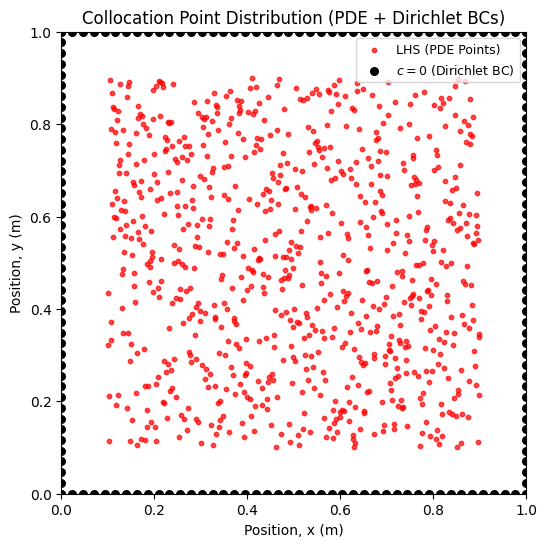

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import qmc

# Define domain boundaries
x_min, x_max = 0, 1
y_min, y_max = 0, 1

# Number of points (increased density for clearer visualization)
num_pde = 800   # Collocation points (LHS in interior)
num_bc = 2000    # Boundary condition points (uniform, increased for visibility)
num_ic = 200    # Initial condition points (uniform, increased for clarity)

# Generate Latin Hypercube Sampling (LHS) for PDE collocation points inside the domain (excluding edges)
sampler = qmc.LatinHypercube(d=2)
lhs_points = sampler.random(num_pde)
lhs_points = qmc.scale(lhs_points, [x_min+0.1, y_min+0.1], [x_max-0.1, y_max-0.1])  # Avoid edges

# Generate Uniform Boundary Points (explicitly gridded for clearer visualization)
bc_x = np.linspace(x_min, x_max, int(np.sqrt(num_bc)))
bc_y = np.linspace(y_min, y_max, int(np.sqrt(num_bc)))
bc_top = np.array([[x, y_max] for x in bc_x])
bc_bottom = np.array([[x, y_min] for x in bc_x])
bc_left = np.array([[x_min, y] for y in bc_y])
bc_right = np.array([[x_max, y] for y in bc_y])
bc_points = np.vstack([bc_top, bc_bottom, bc_left, bc_right])

# Generate Initial Condition Points (Explicitly Gridded for Clarity)
ic_x = np.linspace(x_min, x_max, int(np.sqrt(num_ic)))
ic_y = np.linspace(y_min, y_max, int(np.sqrt(num_ic)))
ic_xx, ic_yy = np.meshgrid(ic_x, ic_y)
ic_points = np.vstack([ic_xx.ravel(), ic_yy.ravel()]).T

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))

# Plot PDE collocation points (red, dense in the interior)
ax.scatter(lhs_points[:, 0], lhs_points[:, 1], color='red', s=10, alpha=0.7, label='LHS (PDE Points)')

# Plot Dirichlet boundary conditions all around (increased density for thicker mapping)
ax.scatter(bc_points[:, 0], bc_points[:, 1], color='black', s=30, label=r'$c = 0$ (Dirichlet BC)', edgecolors='black')

# Set labels and style
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel("Position, x (m)")
ax.set_ylabel("Position, y (m)")
ax.set_title("Collocation Point Distribution (PDE + Dirichlet BCs)")
ax.legend(loc='upper right', fontsize=9, frameon=True)
ax.grid(False)

# Show plot
plt.show()

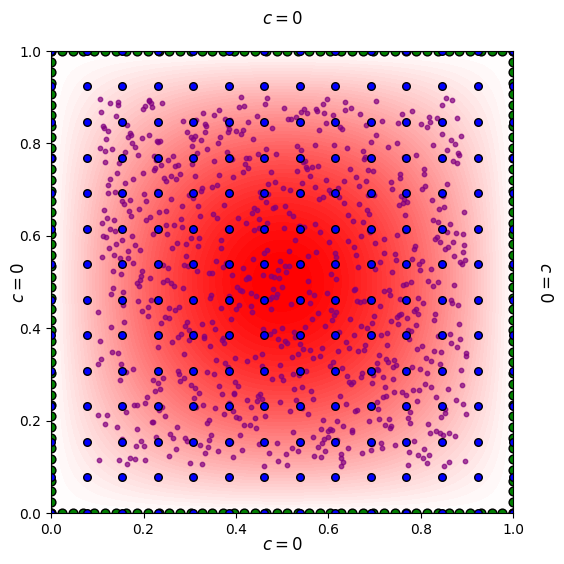

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap



# Create grid for background
x = np.linspace(0, 1, 200)
y = np.linspace(0, 1, 200)
X, Y = np.meshgrid(x, y)

# Define the sinusoidal function for the colormap background
Z = np.sin(np.pi * X) * np.sin(np.pi * Y)

# Define a red-to-white colormap
colors = ["white", "red"]
cmap = LinearSegmentedColormap.from_list("white_red", colors)

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the contour background
contour = ax.contourf(X, Y, Z, levels=50, cmap=cmap)
#plt.colorbar(contour, label=r'$c(x,y) = \sin(\pi x) \sin(\pi y)$')


# Label boundary as c=0
ax.text(0.5, -0.05, r'$c = 0$', ha='center', va='top', color='black', fontsize=12)
ax.text(0.5, 1.05, r'$c = 0$', ha='center', va='bottom', color='black', fontsize=12)
ax.text(-0.05, 0.5, r'$c = 0$', ha='right', va='center', rotation=90, color='black', fontsize=12)
ax.text(1.05, 0.5, r'$c = 0$', ha='left', va='center', rotation=-90, color='black', fontsize=12)

# Overlay collocation points

# Plot PDE collocation points (LHS, red, scattered inside)
ax.scatter(lhs_points[:, 0], lhs_points[:, 1], color='purple', s=10, alpha=0.7, label='LHS (PDE Points)')

# Plot Dirichlet boundary conditions (black, increased density)
ax.scatter(bc_points[:, 0], bc_points[:, 1], color='green', s=40, label=r'$c = 0$ (Dirichlet BC)', edgecolors='black')

# Plot Initial Condition Points (Blue)
ax.scatter(ic_points[:, 0], ic_points[:, 1], color='blue', s=30, label=r'$c(x,y,0)$ (IC)', edgecolors='black')

# Set labels and style
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_title("Collocation Points Overlaid on Sinusoidal Field")
#ax.legend(loc='upper right', fontsize=9, frameon=True)
ax.set_aspect('equal')

# Show plot
plt.show()


#1D

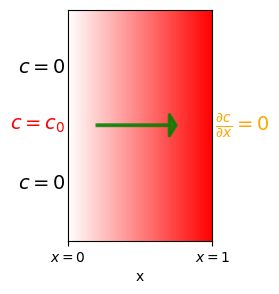

In [5]:
# Define 1D domain
x_min, x_max = 0, 1
num_x = 200

# Create grid for background gradient
x = np.linspace(x_min, x_max, num_x)
Z = np.linspace(1, 0, num_x)  # Gradient from red to white

# Define a red-to-white colormap for diffusion
colors = ["red", "white"]
cmap = LinearSegmentedColormap.from_list("red_white", colors)

# Create figure for 1D representation
fig, ax = plt.subplots(figsize=(8, 3))

# Plot the background gradient (diffusion representation)
ax.imshow(Z[np.newaxis, :], extent=[x_min, x_max, -0.1, 0.1], aspect="auto", cmap=cmap)

# Add boundary condition labels
ax.text(-0.02, 0, r'$c = c_0$', ha='right', va='center', fontsize=14, color='red')
ax.text(-0.02, 0.05, r'$c = 0$', ha='right', va='center', fontsize=14, color='black')
ax.text(-0.02, -0.05, r'$c = 0$', ha='right', va='center', fontsize=14, color='black')

# Neumann BC at the right (flux-free boundary)
ax.text(1.02, 0, r'$\frac{\partial c}{\partial x} = 0$', ha='left', va='center', fontsize=14, color='orange')

# Draw arrows to represent diffusion flow
ax.arrow(0.2, 0, 0.5, 0, head_width=0.02, head_length=0.05, fc='green', ec='green', linewidth=2, alpha=0.8)

# Remove y-axis (since this is 1D)
ax.set_yticks([])
ax.set_xticks([0, 1])
ax.set_xticklabels([r"$x=0$", r"$x=1$"])
ax.set_xlabel("x")

# Set limits and aspect ratio
ax.set_xlim([x_min, x_max])
ax.set_ylim([-0.1, 0.1])
ax.set_aspect(8)

# Show 1D diffusion plot
plt.show()

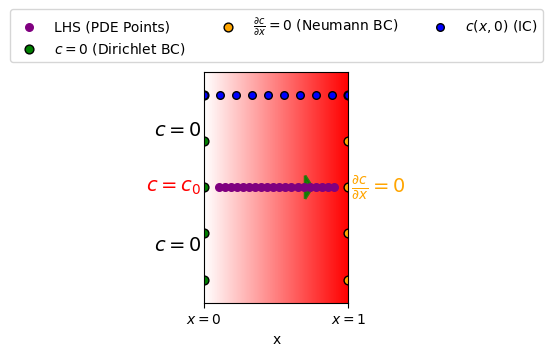

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define 1D domain
x_min, x_max = 0, 1
num_x = 200
x = np.linspace(x_min, x_max, num_x)

# Create a red-to-white gradient background
Z = np.linspace(1, 0, num_x)  # 1 at x_min, 0 at x_max
colors = ["red", "white"]
cmap = LinearSegmentedColormap.from_list("red_white", colors)

fig, ax = plt.subplots(figsize=(8, 3))
ax.imshow(Z[np.newaxis, :], extent=[x_min, x_max, -0.1, 0.1],
          aspect="auto", cmap=cmap)

# Add boundary condition labels
ax.text(-0.02, 0, r'$c = c_0$', ha='right', va='center', fontsize=14, color='red')
ax.text(-0.02, 0.05, r'$c = 0$', ha='right', va='center', fontsize=14, color='black')
ax.text(-0.02, -0.05, r'$c = 0$', ha='right', va='center', fontsize=14, color='black')
ax.text(1.02, 0, r'$\frac{\partial c}{\partial x} = 0$', ha='left', va='center', fontsize=14, color='orange')

# Draw an arrow to represent diffusion flow
ax.arrow(0.2, 0, 0.5, 0, head_width=0.02, head_length=0.05,
         fc='green', ec='green', linewidth=2, alpha=0.8)

# Overlay PDE collocation points (interior)
num_lhs = 20
lhs_x = np.linspace(0.1, 0.9, num_lhs)
lhs_y = np.zeros(num_lhs)
ax.scatter(lhs_x, lhs_y, color='purple', s=30, label='LHS (PDE Points)')

# Overlay Dirichlet BC points (placed along x=0)
bc_y = np.linspace(-0.08, 0.08, 5)
bc_x = np.zeros_like(bc_y)
ax.scatter(bc_x, bc_y, color='green', s=40, edgecolors='black',
           label=r'$c = 0$ (Dirichlet BC)')

# Overlay Neumann BC points (placed along x=1)
nbc_y = np.linspace(-0.08, 0.08, 5)
nbc_x = np.ones_like(nbc_y)
ax.scatter(nbc_x, nbc_y, color='orange', s=40, edgecolors='black',
           label=r'$\frac{\partial c}{\partial x}=0$ (Neumann BC)')

# Overlay Initial Condition points (along the top of the domain)
ic_x = np.linspace(0, 1, 10)
ic_y = np.full(ic_x.shape, 0.08)  # positioned at y = 0.08
ax.scatter(ic_x, ic_y, color='blue', s=30, edgecolors='black',
           label=r'$c(x,0)$ (IC)')

# Set axis properties
ax.set_xticks([0, 1])
ax.set_xticklabels([r"$x=0$", r"$x=1$"])
ax.set_yticks([])
ax.set_xlabel("x")
ax.set_xlim([x_min, x_max])
ax.set_ylim([-0.1, 0.1])
ax.set_aspect(8)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3)

plt.show()

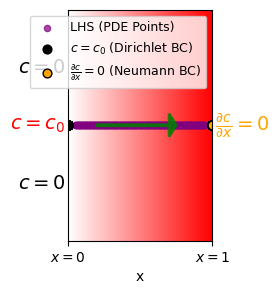

In [8]:
# Define number of collocation points
num_pde = 300  # Interior LHS points for solving PDE
num_bc = 100   # Boundary condition points (evenly spaced at x=0 and x=1)
num_ic = 100   # Initial condition points (evenly spaced at t=0)

# Generate Latin Hypercube Sampling (LHS) for PDE collocation points inside the domain
sampler = qmc.LatinHypercube(d=1)
lhs_points = sampler.random(num_pde)
lhs_points = qmc.scale(lhs_points, x_min + 0.05, x_max - 0.05)  # Avoid edges

# Generate Uniform Boundary Condition Points
bc_left = np.full(num_bc, x_min)  # Dirichlet BC at x=0
bc_right = np.full(num_bc, x_max)  # Neumann BC at x=1

# Create figure
fig, ax = plt.subplots(figsize=(8, 3))

# Plot the background gradient (diffusion representation)
ax.imshow(Z[np.newaxis, :], extent=[x_min, x_max, -0.1, 0.1], aspect="auto", cmap=cmap)

# Overlay collocation points
ax.scatter(lhs_points, np.zeros_like(lhs_points), color='purple', s=20, alpha=0.7, label='LHS (PDE Points)')
ax.scatter(bc_left, np.zeros_like(bc_left), color='black', s=40, label=r'$c = c_0$ (Dirichlet BC)', edgecolors='black')
ax.scatter(bc_right, np.zeros_like(bc_right), color='orange', s=40, label=r'$\frac{\partial c}{\partial x} = 0$ (Neumann BC)', edgecolors='black')

# Adjust boundary labels
ax.text(-0.02, 0, r'$c = c_0$', ha='right', va='center', fontsize=14, color='red')
ax.text(-0.02, 0.05, r'$c = 0$', ha='right', va='center', fontsize=14, color='black')
ax.text(-0.02, -0.05, r'$c = 0$', ha='right', va='center', fontsize=14, color='black')
ax.text(1.02, 0, r'$\frac{\partial c}{\partial x} = 0$', ha='left', va='center', fontsize=14, color='orange')

# Draw diffusion arrow
ax.arrow(0.2, 0, 0.5, 0, head_width=0.02, head_length=0.05, fc='green', ec='green', linewidth=2, alpha=0.8)

# Remove y-axis (since this is 1D)
ax.set_yticks([])
ax.set_xticks([0, 1])
ax.set_xticklabels([r"$x=0$", r"$x=1$"])
ax.set_xlabel("x")

# Set limits and aspect ratio
ax.set_xlim([x_min, x_max])
ax.set_ylim([-0.1, 0.1])
ax.set_aspect(8)

# Show plot with collocation points
plt.legend(loc='upper right', fontsize=9, frameon=True)
plt.show()

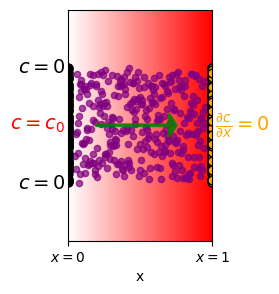

In [10]:
# Adjust collocation points to lie within a 2D strip for improved readability

# Define vertical placement for better visualization
y_pde = np.random.uniform(-0.05, 0.05, num_pde)  # Randomly distribute PDE points within strip
y_bc = np.random.uniform(-0.05, 0.05, num_bc)  # Slightly vary boundary points

# Create figure
fig, ax = plt.subplots(figsize=(8, 3))

# Plot the background gradient (diffusion representation)
ax.imshow(Z[np.newaxis, :], extent=[x_min, x_max, -0.1, 0.1], aspect="auto", cmap=cmap)

# Overlay adjusted collocation points within the domain
ax.scatter(lhs_points, y_pde, color='purple', s=20, alpha=0.7, label='LHS (PDE Points)')  # LHS PDE points inside
ax.scatter(bc_left, y_bc, color='black', s=40, label=r'$c = c_0$ (Dirichlet BC)', edgecolors='black')  # Dirichlet BCs
ax.scatter(bc_right, y_bc, color='orange', s=40, label=r'$\frac{\partial c}{\partial x} = 0$ (Neumann BC)', edgecolors='black')  # Neumann BCs

# Adjust boundary labels
ax.text(-0.02, 0, r'$c = c_0$', ha='right', va='center', fontsize=14, color='red')
ax.text(-0.02, 0.05, r'$c = 0$', ha='right', va='center', fontsize=14, color='black')
ax.text(-0.02, -0.05, r'$c = 0$', ha='right', va='center', fontsize=14, color='black')
ax.text(1.02, 0, r'$\frac{\partial c}{\partial x} = 0$', ha='left', va='center', fontsize=14, color='orange')

# Draw diffusion arrow
ax.arrow(0.2, 0, 0.5, 0, head_width=0.02, head_length=0.05, fc='green', ec='green', linewidth=2, alpha=0.8)

# Remove y-axis (since this is 1D but we visualize it in 2D)
ax.set_yticks([])
ax.set_xticks([0, 1])
ax.set_xticklabels([r"$x=0$", r"$x=1$"])
ax.set_xlabel("x")

# Set limits and aspect ratio
ax.set_xlim([x_min, x_max])
ax.set_ylim([-0.1, 0.1])
ax.set_aspect(8)

# Show plot with improved readability
#plt.legend(loc='upper right', fontsize=9, frameon=True)
plt.show()

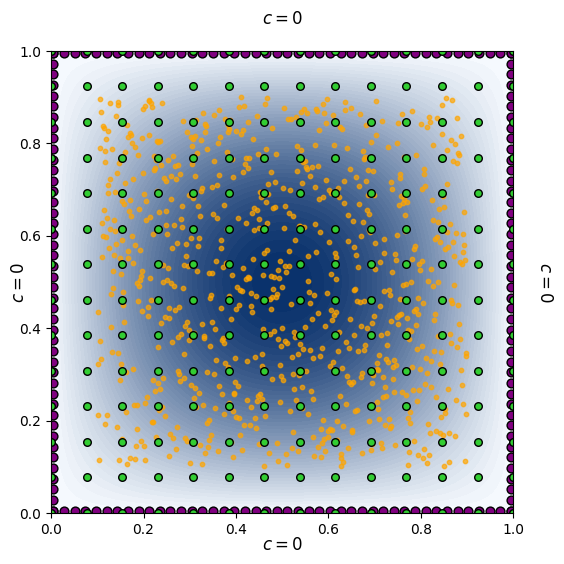

In [16]:
# Improved Visualization with Adjusted Boundary Placement & Color Scheme

# Adjust boundary point placement to prevent cutoff by slightly shifting inward
boundary_offset = 0.005  # Small offset to keep boundary points visible
bc_x = np.linspace(x_min + boundary_offset, x_max - boundary_offset, int(np.sqrt(num_bc)))
bc_y = np.linspace(y_min + boundary_offset, y_max - boundary_offset, int(np.sqrt(num_bc)))

# Re-generate boundary points with offset
bc_top = np.array([[x, y_max - boundary_offset] for x in bc_x])
bc_bottom = np.array([[x, y_min + boundary_offset] for x in bc_x])
bc_left = np.array([[x_min + boundary_offset, y] for y in bc_y])
bc_right = np.array([[x_max - boundary_offset, y] for y in bc_y])
bc_points = np.vstack([bc_top, bc_bottom, bc_left, bc_right])

# Define a blue-to-yellow colormap for better contrast
colors = ["#f7fbff", "#08306b"]  # Light blue to dark blue
cmap = LinearSegmentedColormap.from_list("blue_yellow", colors)

# Create figure with improved color scheme
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the background sinusoidal field
contour = ax.contourf(X, Y, Z, levels=50, cmap=cmap)

# Adjust boundary labels
ax.text(0.5, -0.05, r'$c = 0$', ha='center', va='top', color='black', fontsize=12)
ax.text(0.5, 1.05, r'$c = 0$', ha='center', va='bottom', color='black', fontsize=12)
ax.text(-0.05, 0.5, r'$c = 0$', ha='right', va='center', rotation=90, color='black', fontsize=12)
ax.text(1.05, 0.5, r'$c = 0$', ha='left', va='center', rotation=-90, color='black', fontsize=12)

# Overlay collocation points with improved color choices
ax.scatter(lhs_points[:, 0], lhs_points[:, 1], color='orange', s=10, alpha=0.7, label='LHS (PDE Points)')  # Orange for LHS
ax.scatter(bc_points[:, 0], bc_points[:, 1], color='purple', s=40, label=r'$c = 0$ (Dirichlet BC)', edgecolors='black')  # Purple for BCs
ax.scatter(ic_points[:, 0], ic_points[:, 1], color='limegreen', s=30, label=r'$c(x,y,0)$ (IC)', edgecolors='black')  # Lime green for ICs

# Adjust layout and styling
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_aspect('equal')

# Show improved plot
plt.show()

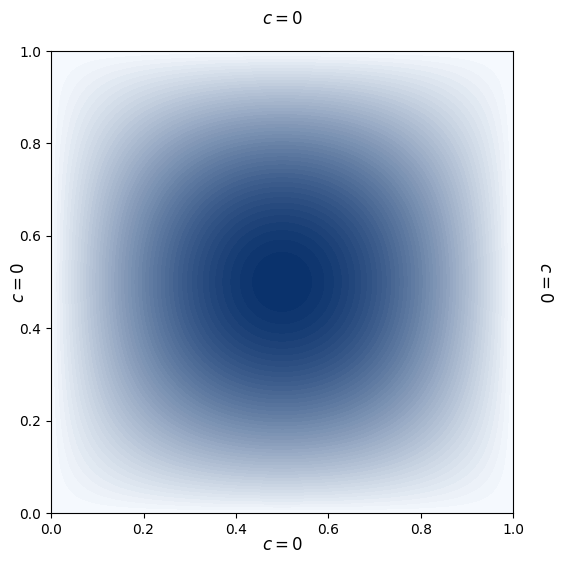

In [14]:
# Improved Visualization with Adjusted Boundary Placement & Color Scheme

# Adjust boundary point placement to prevent cutoff by slightly shifting inward
boundary_offset = 0.005  # Small offset to keep boundary points visible
bc_x = np.linspace(x_min + boundary_offset, x_max - boundary_offset, int(np.sqrt(num_bc)))
bc_y = np.linspace(y_min + boundary_offset, y_max - boundary_offset, int(np.sqrt(num_bc)))

# Re-generate boundary points with offset
bc_top = np.array([[x, y_max - boundary_offset] for x in bc_x])
bc_bottom = np.array([[x, y_min + boundary_offset] for x in bc_x])
bc_left = np.array([[x_min + boundary_offset, y] for y in bc_y])
bc_right = np.array([[x_max - boundary_offset, y] for y in bc_y])
bc_points = np.vstack([bc_top, bc_bottom, bc_left, bc_right])

# Define a blue-to-yellow colormap for better contrast
colors = ["#f7fbff", "#08306b"]  # Light blue to dark blue
cmap = LinearSegmentedColormap.from_list("blue_yellow", colors)

# Create figure with improved color scheme
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the background sinusoidal field
contour = ax.contourf(X, Y, Z, levels=50, cmap=cmap)

# Adjust boundary labels
ax.text(0.5, -0.05, r'$c = 0$', ha='center', va='top', color='black', fontsize=12)
ax.text(0.5, 1.05, r'$c = 0$', ha='center', va='bottom', color='black', fontsize=12)
ax.text(-0.05, 0.5, r'$c = 0$', ha='right', va='center', rotation=90, color='black', fontsize=12)
ax.text(1.05, 0.5, r'$c = 0$', ha='left', va='center', rotation=-90, color='black', fontsize=12)


# Adjust layout and styling
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_aspect('equal')

# Show improved plot
plt.show()